#End-to-End Loan Eligibility Classification

The goal of this project will be to determine loan eligiblity based on a number of features. The intention is to go through all necessary steps of a machine learning classification problem from start to finish.

# Loading Data and EDA


Let's load some preliminary libraries and load the data:

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

original_data = pd.read_csv('loan_data.csv')
loan_data = original_data.copy()

Next let's perform some rudimentary insight into the data:

In [70]:
loan_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [71]:
loan_data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [72]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [73]:
num_data = loan_data.select_dtypes(include=np.number)
cat_data = loan_data.select_dtypes(exclude=np.number)

for col in cat_data.columns:
  print(f'{col}: {loan_data[col].unique()}\n')

person_gender: ['female' 'male']

person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

previous_loan_defaults_on_file: ['No' 'Yes']



In [74]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [75]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


It looks like there are some outliers in the 'person_emp_exp' and 'person_age' columns, let's take a look at the data:

In [76]:
print(sorted(loan_data['person_emp_exp'].unique().tolist()))
print(len(sorted(loan_data['person_emp_exp'].unique().tolist())))
print(sorted(loan_data['person_emp_exp'].value_counts().tolist(), reverse=True))
print(len(sorted(loan_data['person_emp_exp'].value_counts().tolist(), reverse=True)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 57, 58, 61, 62, 76, 85, 93, 100, 101, 121, 124, 125]
63
[9566, 4134, 4061, 3890, 3524, 3000, 2717, 2204, 1890, 1575, 1383, 1148, 926, 768, 662, 567, 481, 413, 367, 263, 240, 187, 160, 133, 129, 102, 97, 60, 48, 43, 34, 30, 29, 24, 17, 15, 13, 12, 10, 9, 9, 8, 8, 8, 7, 5, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
63


In [77]:
print(sorted(loan_data['person_age'].unique(), reverse=True))

[144.0, 123.0, 116.0, 109.0, 94.0, 84.0, 80.0, 78.0, 76.0, 73.0, 70.0, 69.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0]


Now that we have a general idea of what the data *should* look like, let's actually plot the distributions of the numerical data:

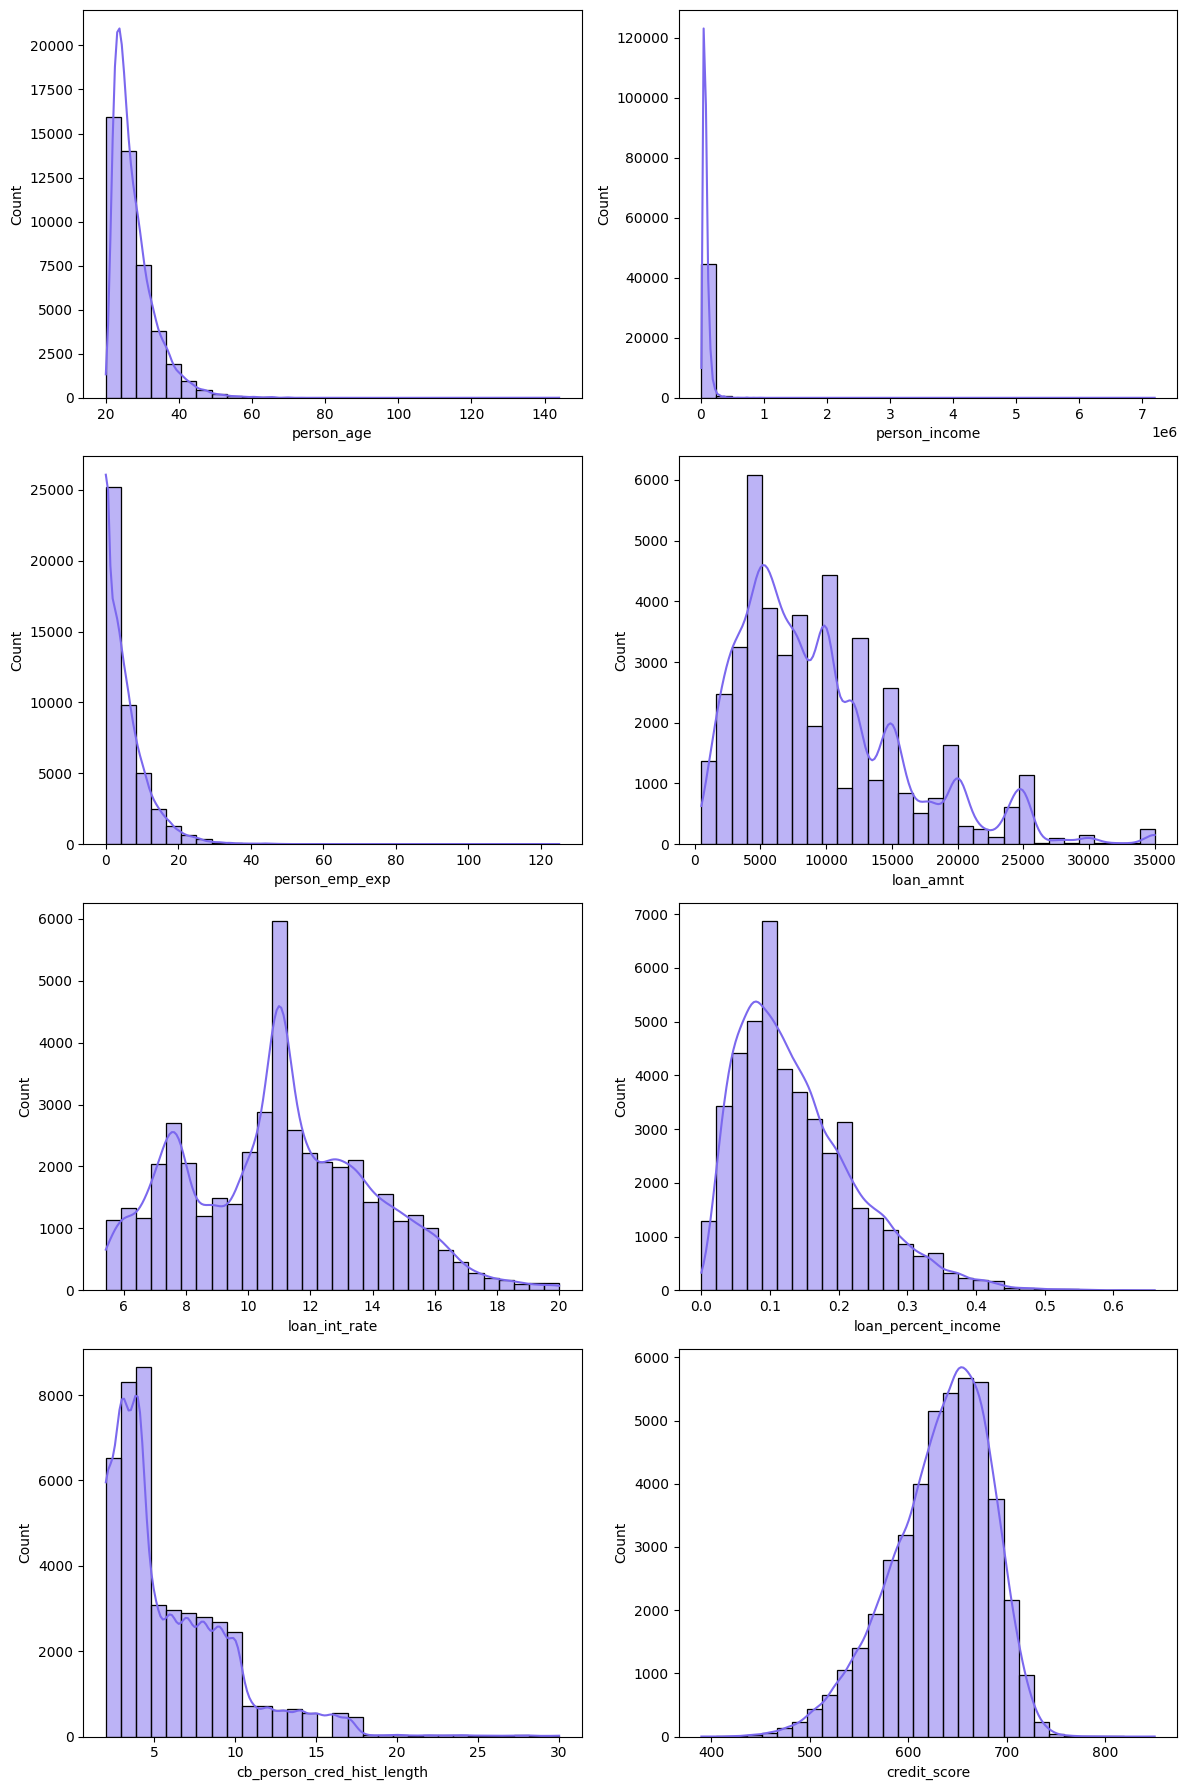

In [78]:
dist_cols = loan_data.select_dtypes(include=np.number).columns.tolist()
dist_cols.remove('loan_status')
plt.figure(figsize=(12, 18))

for i, col in enumerate(dist_cols, 1):
  plt.subplot(4, 2, i)
  sns.histplot(loan_data[col], kde=True, bins=30, color='mediumslateblue')
plt.tight_layout()
plt.show()

Lets look at the distribution of accepted and rejected loans:

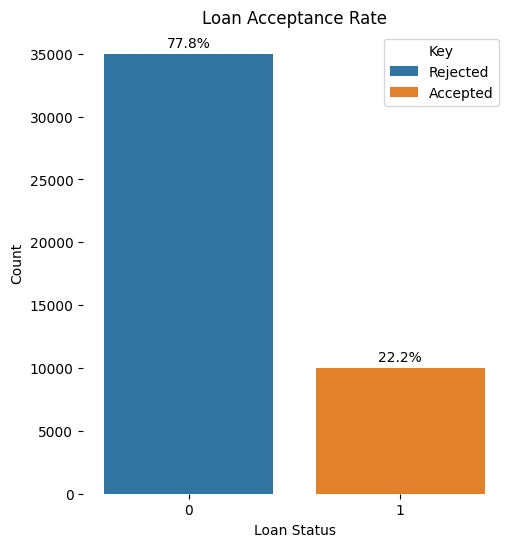

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

loan_status_counts = loan_data['loan_status'].value_counts()
total_count = loan_status_counts.sum()
percentages = (loan_status_counts / total_count) * 100

barplot = sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0],
            palette='tab10', hue=loan_status_counts.index)
handles, labels = barplot.get_legend_handles_labels()

for i, (count, percent) in enumerate(zip(loan_status_counts, percentages)):
  axes[0].text(i, count+500, f'{percent:.1f}%', ha='center', fontsize=10,
               color='black')

axes[0].legend(title='Key', loc='upper right', handles=handles,
           labels=['Rejected', 'Accepted'])
axes[0].set_title('Loan Acceptance Rate')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
sns.despine(left=True, bottom=True)
axes[1].set_visible(False)
plt.show()

We already graphed the distribution of the numerical columns, now lets look at the categorical data. The following function breaks each categorical column into its values and plot the counts for each unique value:

In [80]:
def plot_counts(col, data=loan_data):

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  sns.countplot(y=col, data=data, palette='muted', hue=col)
  ax = plt.gca()
  total = len(data)
  for p in ax.patches:
        count = p.get_width()
        percentage = f'{count / total:.1%}'
        ax.annotate(f'{int(count)}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center',
                    xytext=(10, 0),
                    textcoords='offset points')
        ax.annotate(percentage,
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center',
                    xytext=(15, -10),
                    textcoords='offset points',
                    fontsize=8, color='gray')

  sns.despine(left=True, bottom=True)
  plt.title(f'Distribution: {col}')
  plt.tight_layout()
  plt.show()

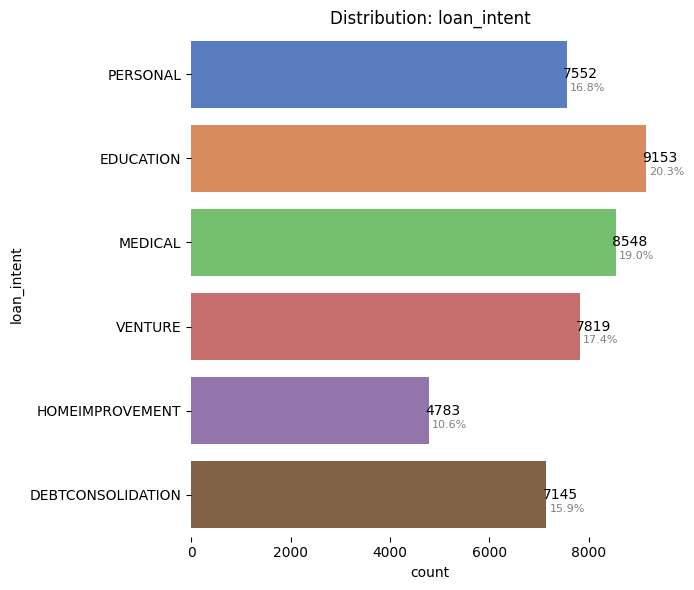

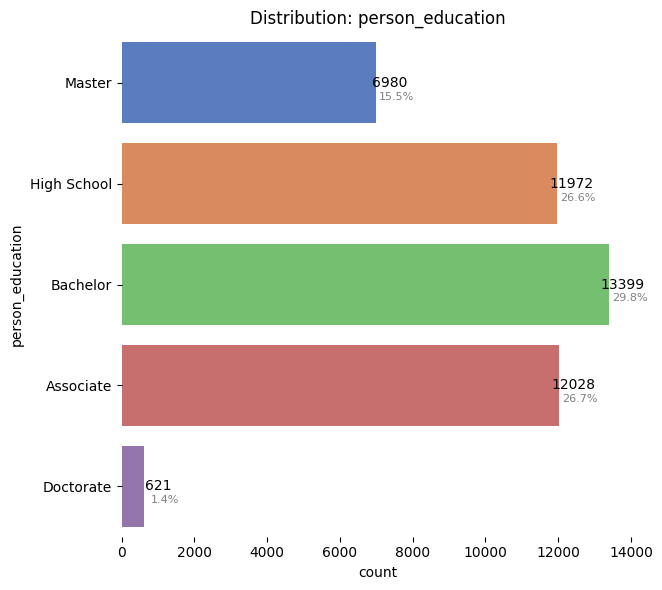

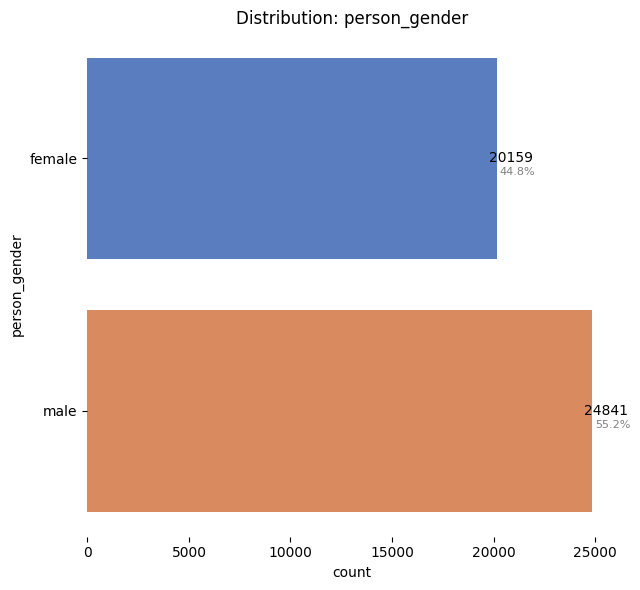

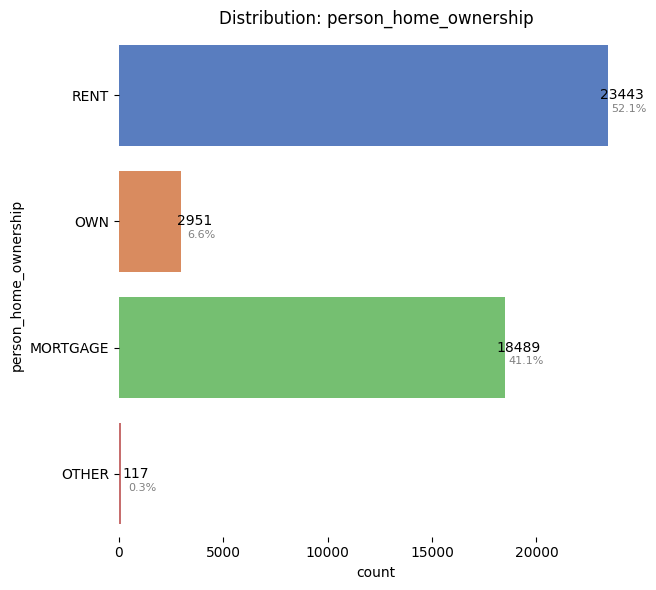

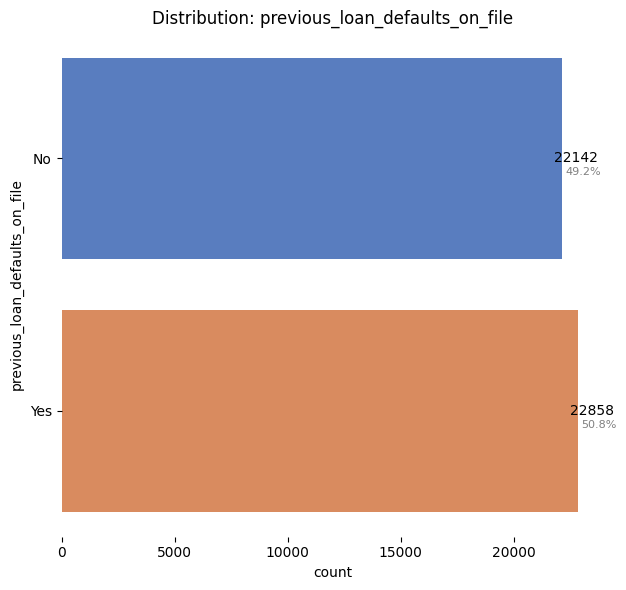

In [81]:
plot_counts('loan_intent')
plot_counts('person_education')
plot_counts('person_gender')
plot_counts('person_home_ownership')
plot_counts('previous_loan_defaults_on_file')

This is just out of curiosity but let's see the distributions of loans applied for based on age groups. This seems like something that would be important in a real world scenario and could lead to further insight outside of the model, maybe in a human pipeline.

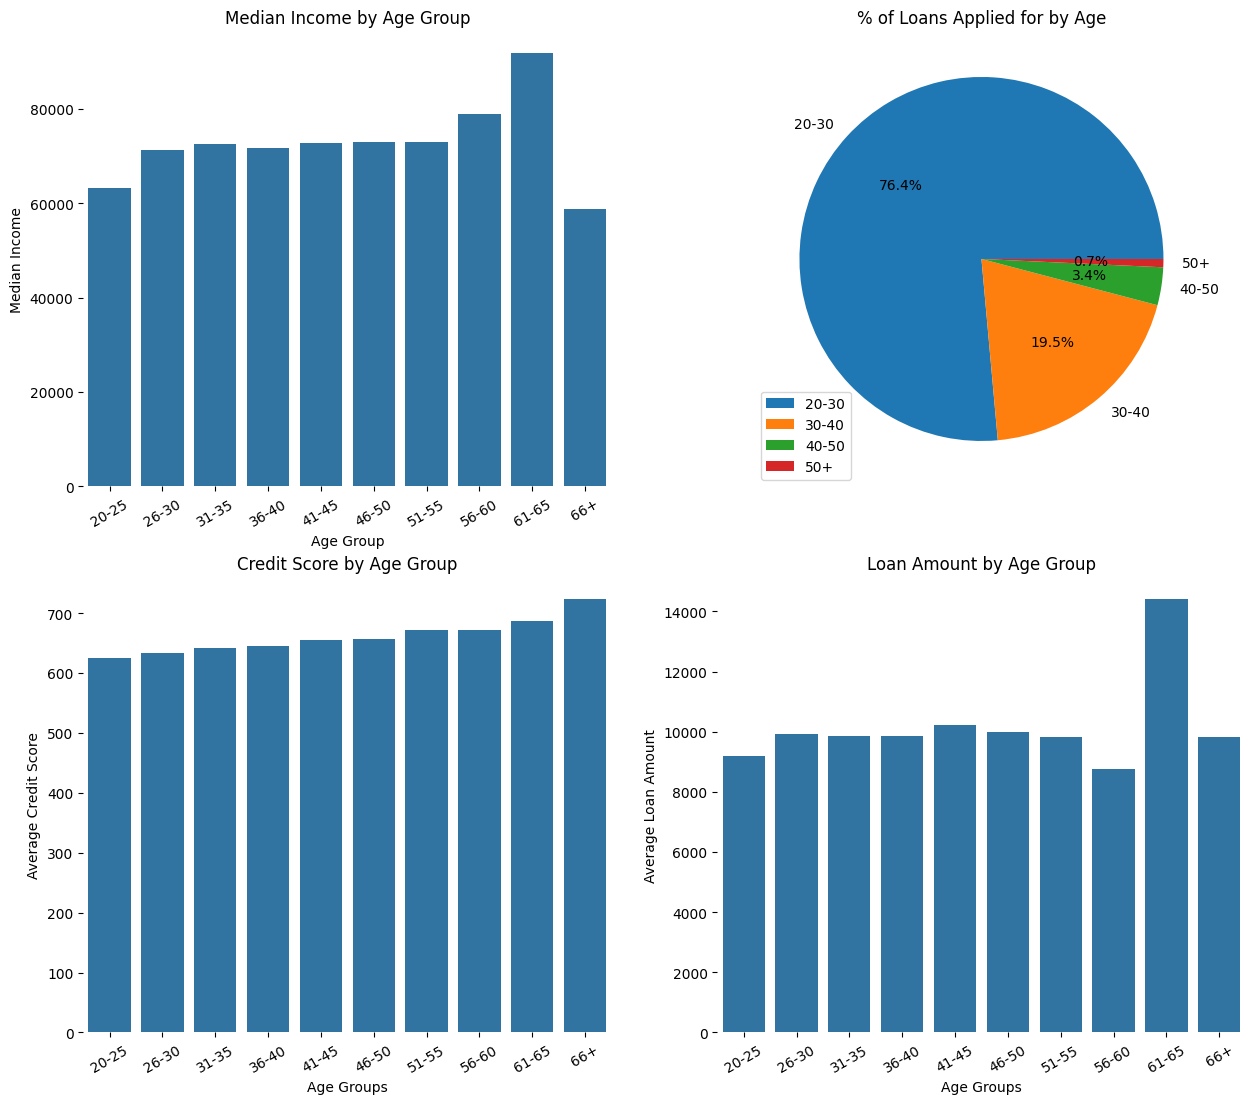

In [82]:
pie_bins = [20, 30, 40, 50, 144]
pie_labels = ['20-30','30-40', '40-50', '50+']
loan_data['pie_age_categories'] = pd.cut(loan_data['person_age'], bins=pie_bins,
                                     labels=pie_labels)
hist_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60 , 65, 144]
hist_labels = ['20-25', '26-30', '31-35', '36-40','41-45','46-50','51-55',
               '56-60','61-65','66+']
loan_data['hist_age_categories'] = pd.cut(loan_data['person_age'],
                                          bins=hist_bins, labels=hist_labels)

age_counts = loan_data['pie_age_categories'].value_counts()
average_incomes = loan_data.groupby('hist_age_categories',
                                    observed=True)['person_income'].median()
average_credit_scores = loan_data.groupby('hist_age_categories' ,
                                          observed=True)['credit_score'].mean()
average_loan_amounts = loan_data.groupby('hist_age_categories',
                                         observed=True)['loan_amnt'].mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))
income_hist = sns.barplot(x=average_incomes.index, y=average_incomes.values,
                   ax=axes[0, 0])

axes[0, 0].set_title('Median Income by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Median Income')
axes[0, 0].tick_params(axis='x', rotation=30)
sns.despine(left=True, bottom=True)

axes[0, 1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('% of Loans Applied for by Age')
axes[0, 1].legend(loc='lower left')

credit_score_hist = sns.barplot(x=average_credit_scores.index,
                                y=average_credit_scores.values, ax=axes[1, 0])
axes[1, 0].set_title('Credit Score by Age Group')
axes[1, 0].set_xlabel('Age Groups')
axes[1, 0].set_ylabel('Average Credit Score')
axes[1, 0].tick_params(axis='x', rotation=30)

loan_amount_hist = sns.barplot(x=average_loan_amounts.index,
                               y=average_loan_amounts.values,
                               ax=axes[1, 1])
axes[1, 1].set_title('Loan Amount by Age Group')
axes[1, 1].set_xlabel('Age Groups')
axes[1, 1].set_ylabel('Average Loan Amount')
axes[1, 1].tick_params(axis='x', rotation=30)
plt.show()

Now let's look into the actual correlations of each numerical column based on loan_status:

In [83]:
correlations = loan_data.corr(numeric_only=True)
correlations['loan_status'].sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.384880
loan_int_rate,0.332005
loan_amnt,0.107714
credit_score,-0.007647
cb_person_cred_hist_length,-0.014851
person_emp_exp,-0.020481
person_age,-0.021476
person_income,-0.135808


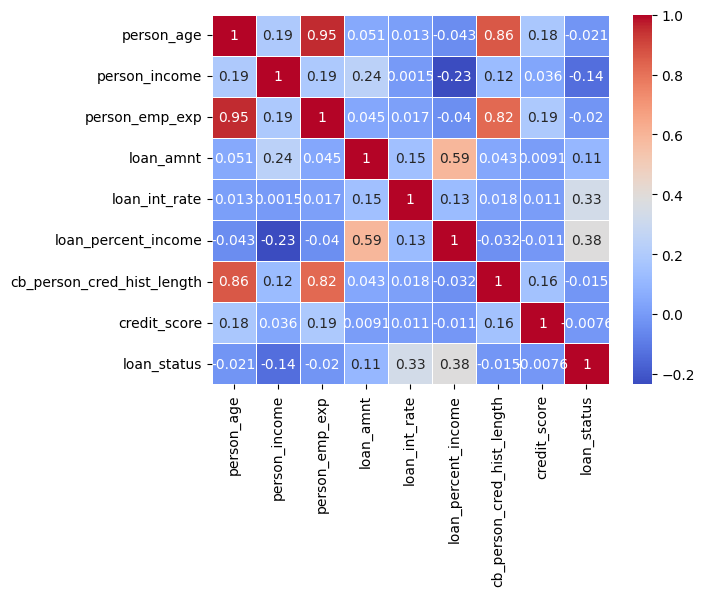

In [84]:
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Next, each numerical feature plotted against each other:

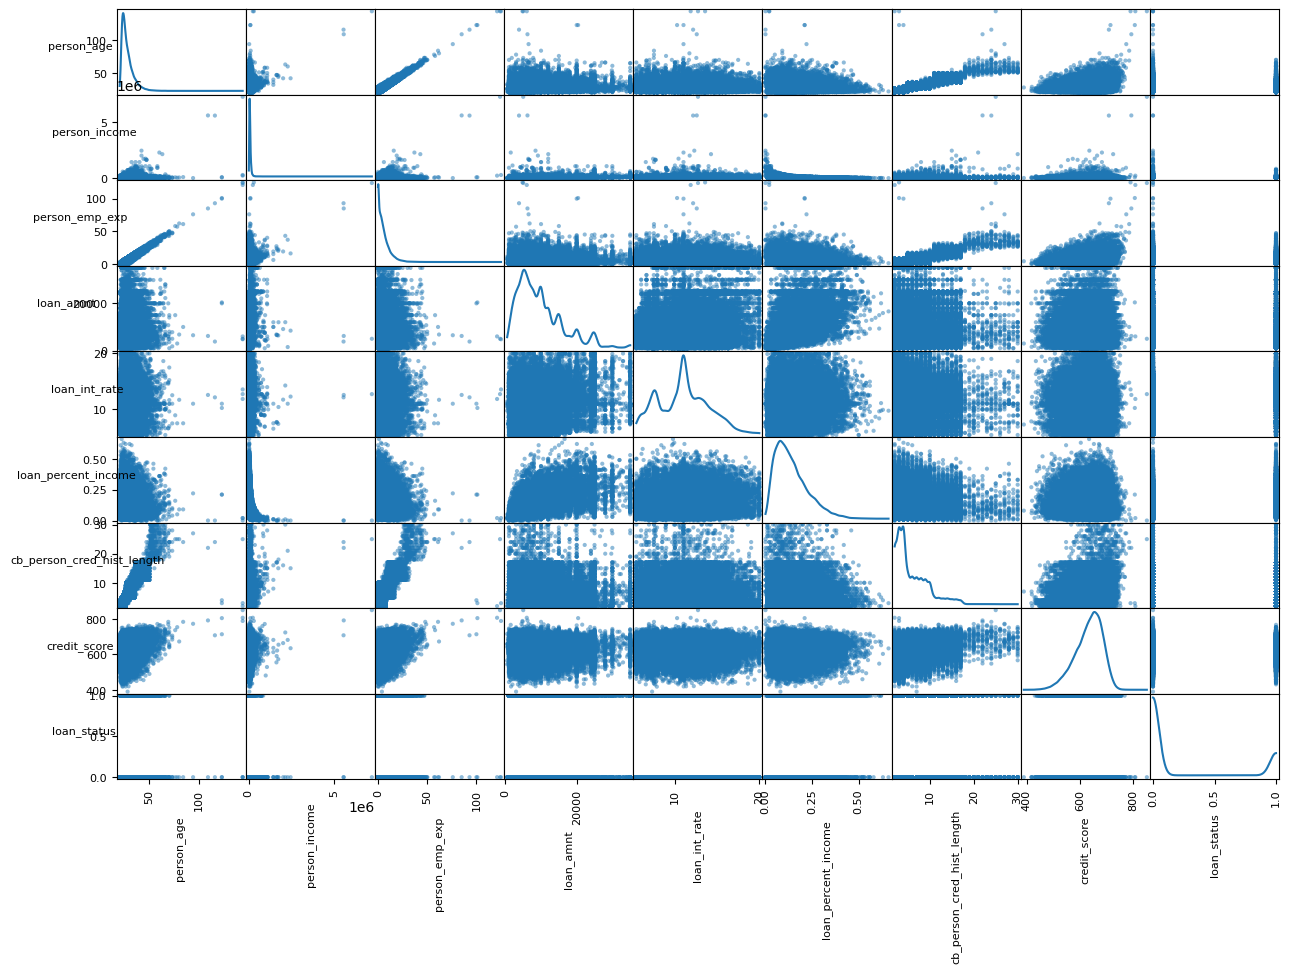

In [85]:
features = loan_data.select_dtypes(include=np.number).columns.tolist()

from pandas.plotting import scatter_matrix
axes = scatter_matrix(loan_data[features], figsize=(15,10), diagonal='kde')
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0)
plt.show()

It looks like most of the numerical columns need to be transformed and scaled, we will do that later during cleanup.